(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week11/notebook/demo.ipynb)

# Example: German Credit Risk data
- https://www.kaggle.com/datasets/uciml/german-credit

In this dataset
- Each entry represents a person who takes a credit by a bank. 
- Each person is classified as good or bad credit risks according to the set of attributes.

The selected attributes are:
- **Age** (numeric)
- **Sex** (text: male, female)
- **Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- **Housing** (text: own, rent, or free)
- **Saving accounts** (text - little, moderate, quite rich, rich)
- **Checking account** (numeric, in DM - Deutsch Mark)
- **Credit amount** (numeric, in DM)
- **Duration** (numeric, in month)
- **Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
import pandas as pd

credit = pd.read_csv('../data/credit_data_risk.csv')
credit.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [2]:
credit.shape

(1000, 11)

In [3]:
credit.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
credit.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


## Data Exploration

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
credit['Saving accounts'].value_counts().reset_index()

,Saving accounts,count
0,little,603
1,moderate,103
2,quite rich,63
3,rich,48


In [7]:
credit['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [8]:
credit['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
numerical_credit = credit.select_dtypes(exclude='O')
numerical_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

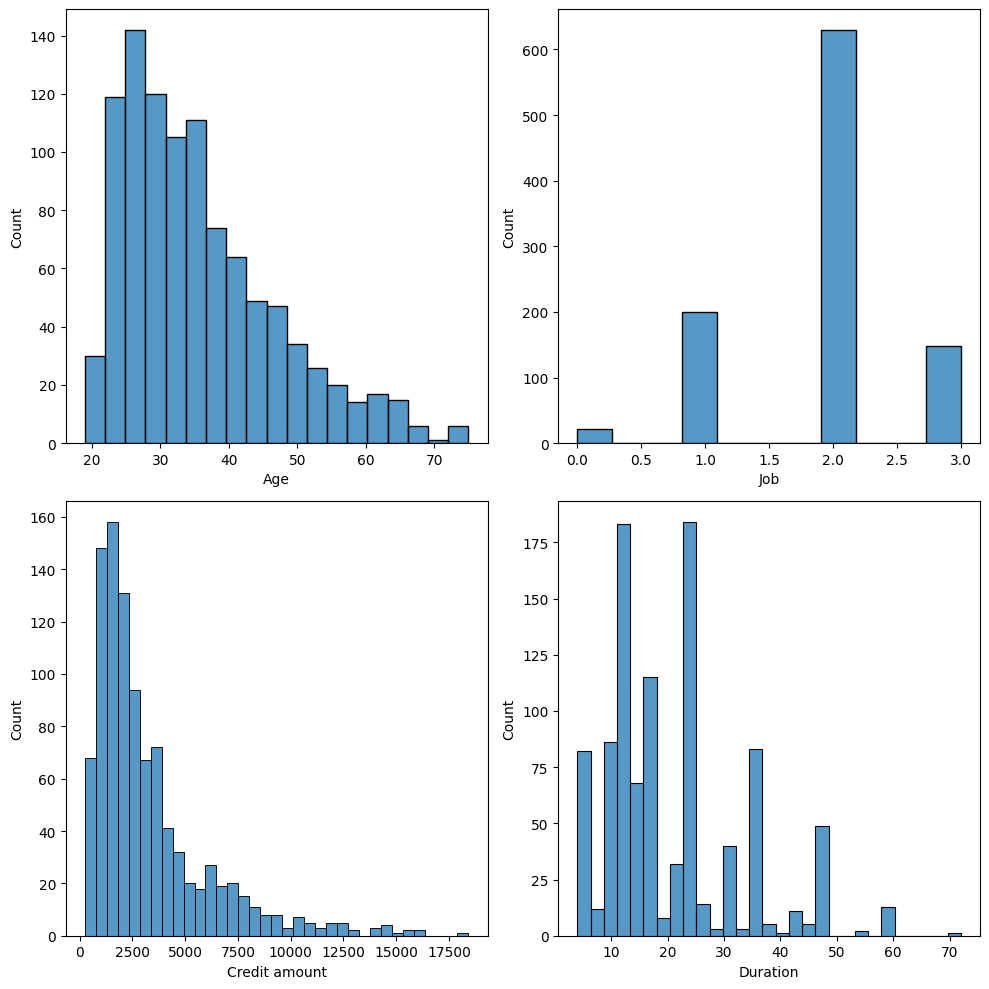

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(x='Age', data=credit, ax=axes[0, 0])
sns.histplot(x='Job', data=credit, ax=axes[0, 1])
sns.histplot(x='Credit amount', data=credit, ax=axes[1, 0])
sns.histplot(x='Duration', data=credit, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [11]:
credit['Job'].value_counts().reset_index()

,Job,count
0,2,630
1,1,200
2,3,148
3,0,22


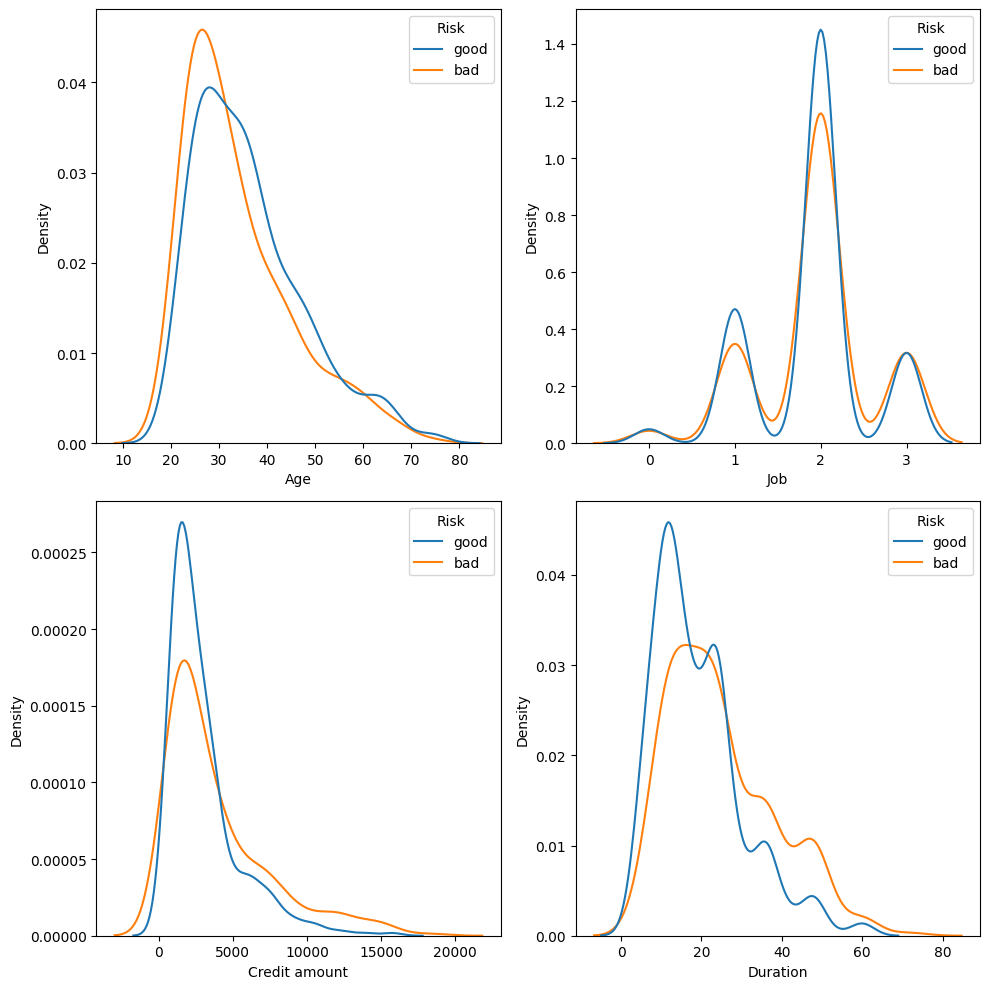

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(x='Age', hue='Risk', data=credit, ax=axes[0, 0], common_norm=False)
sns.kdeplot(x='Job', hue='Risk', data=credit, ax=axes[0, 1], common_norm=False)
sns.kdeplot(x='Credit amount', hue='Risk', data=credit, ax=axes[1, 0], common_norm=False)
sns.kdeplot(x='Duration', hue='Risk', data=credit, ax=axes[1, 1], common_norm=False)

plt.tight_layout()
plt.show()

In [13]:
cat_credit = credit.select_dtypes(include='O')
cat_credit.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

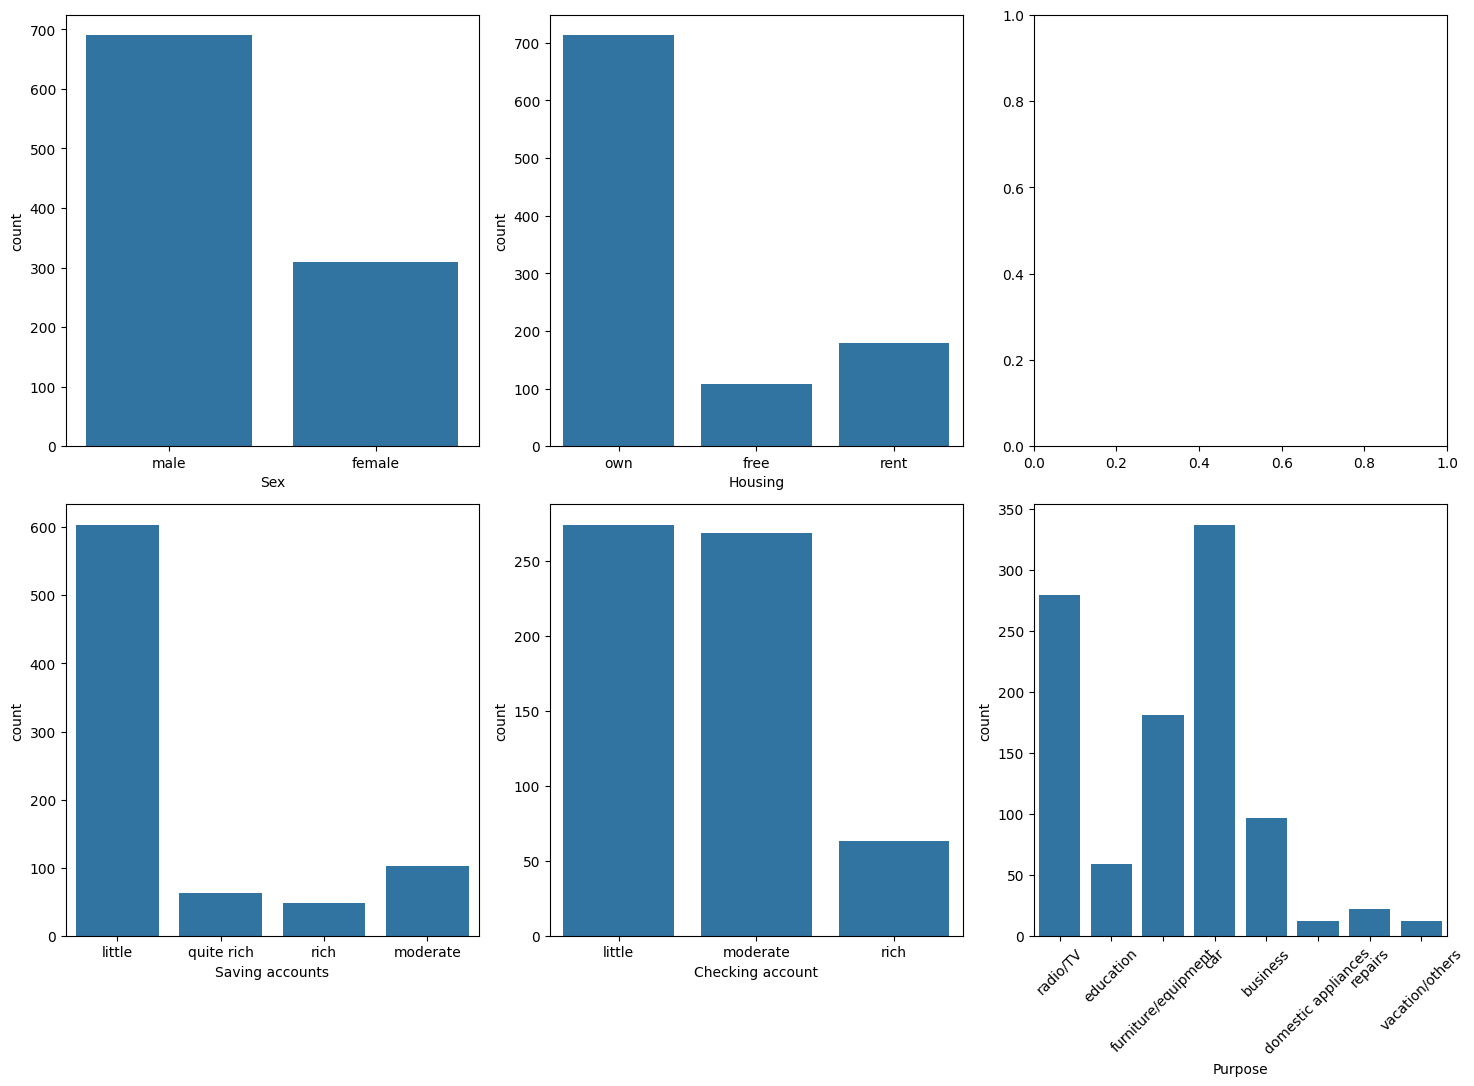

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='Sex', data=credit, ax=axes[0, 0])
sns.countplot(x='Housing', data=credit, ax=axes[0, 1])
sns.countplot(x='Saving accounts', data=credit, ax=axes[1, 0])
sns.countplot(x='Checking account', data=credit, ax=axes[1, 1])
sns.countplot(x='Purpose', data=credit, ax=axes[1, 2])

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

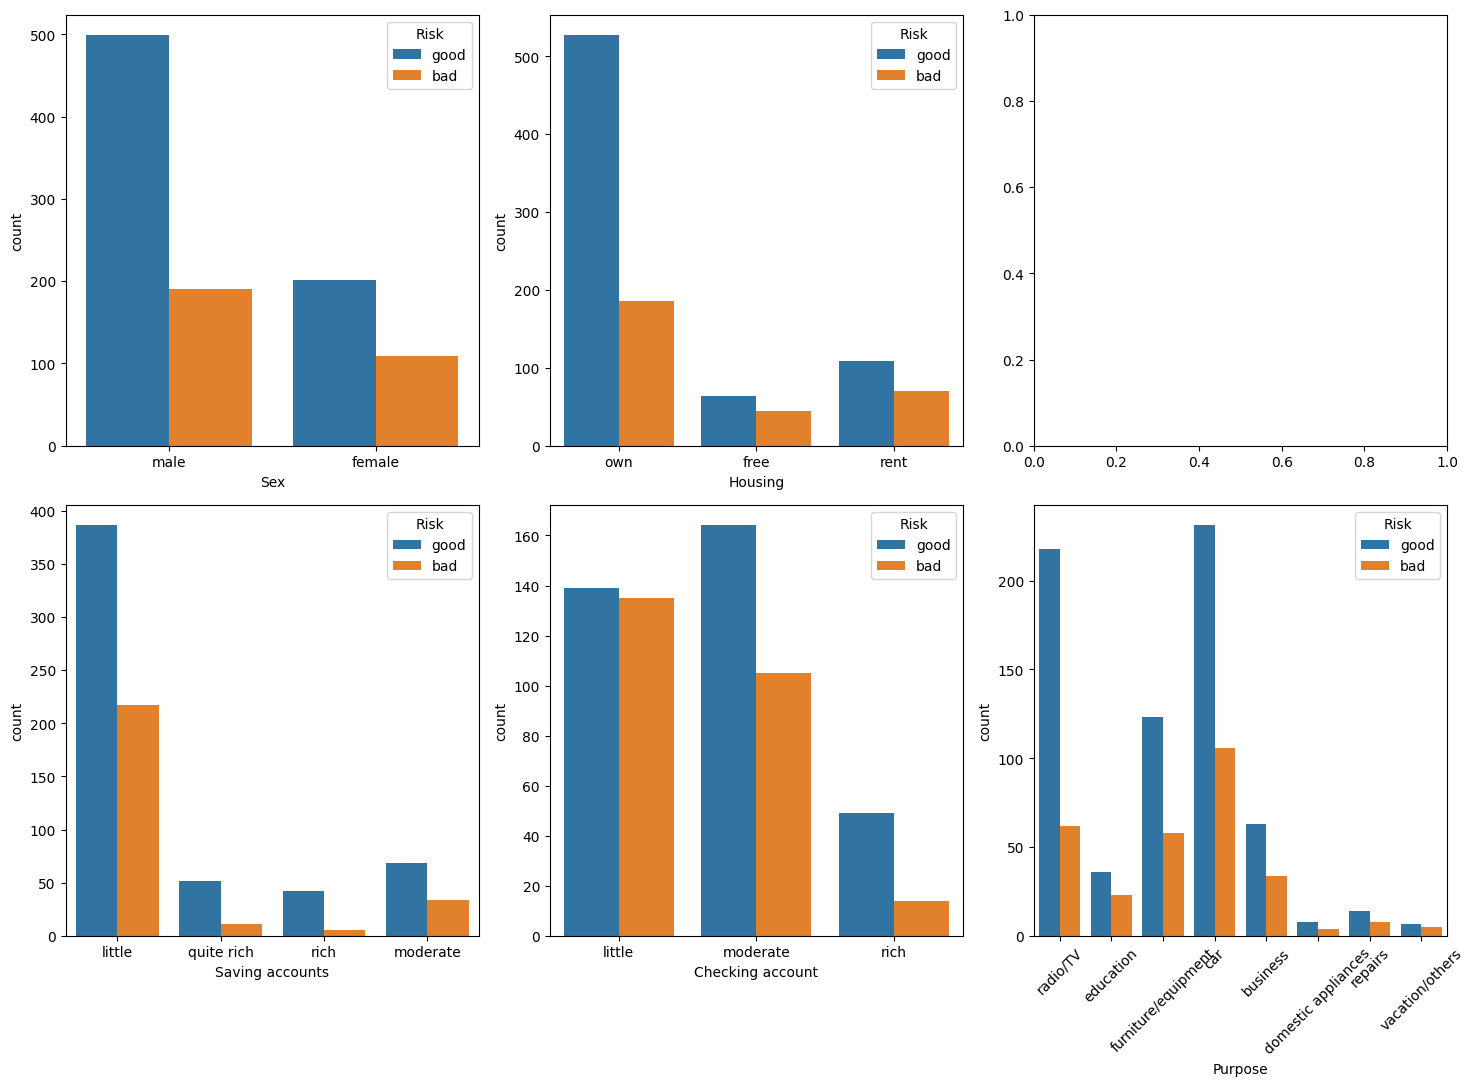

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='Sex', hue='Risk', data=credit, ax=axes[0, 0])
sns.countplot(x='Housing', hue='Risk', data=credit, ax=axes[0, 1])
sns.countplot(x='Saving accounts', hue='Risk', data=credit, ax=axes[1, 0])
sns.countplot(x='Checking account', hue='Risk', data=credit, ax=axes[1, 1])
sns.countplot(x='Purpose', hue='Risk', data=credit, ax=axes[1, 2])

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Customer Segmentation

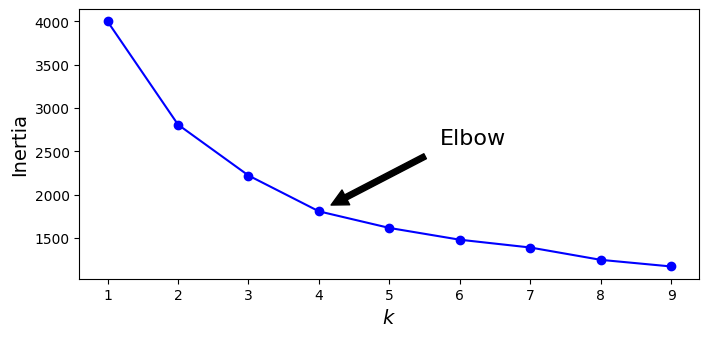

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

## try different k values
kmeans_per_k = [KMeans(n_clusters=k).fit(scaled_credit) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.ylim(0, 1300)
plt.show()

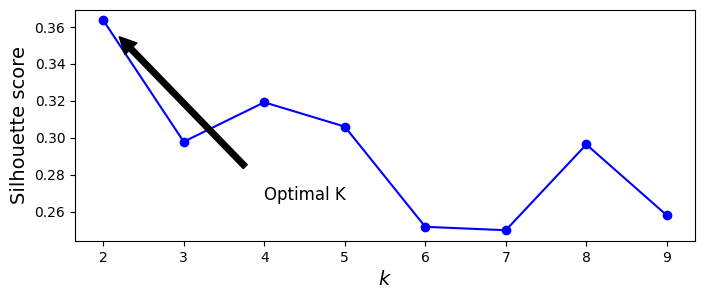

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(scaled_credit, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Optimal K',
             xy=(2, silhouette_scores[0]),
             xytext=(0.33, 0.33),
             textcoords='figure fraction',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

### When `k=2`

In [19]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

In [18]:
numerical_credit.head(3)

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12


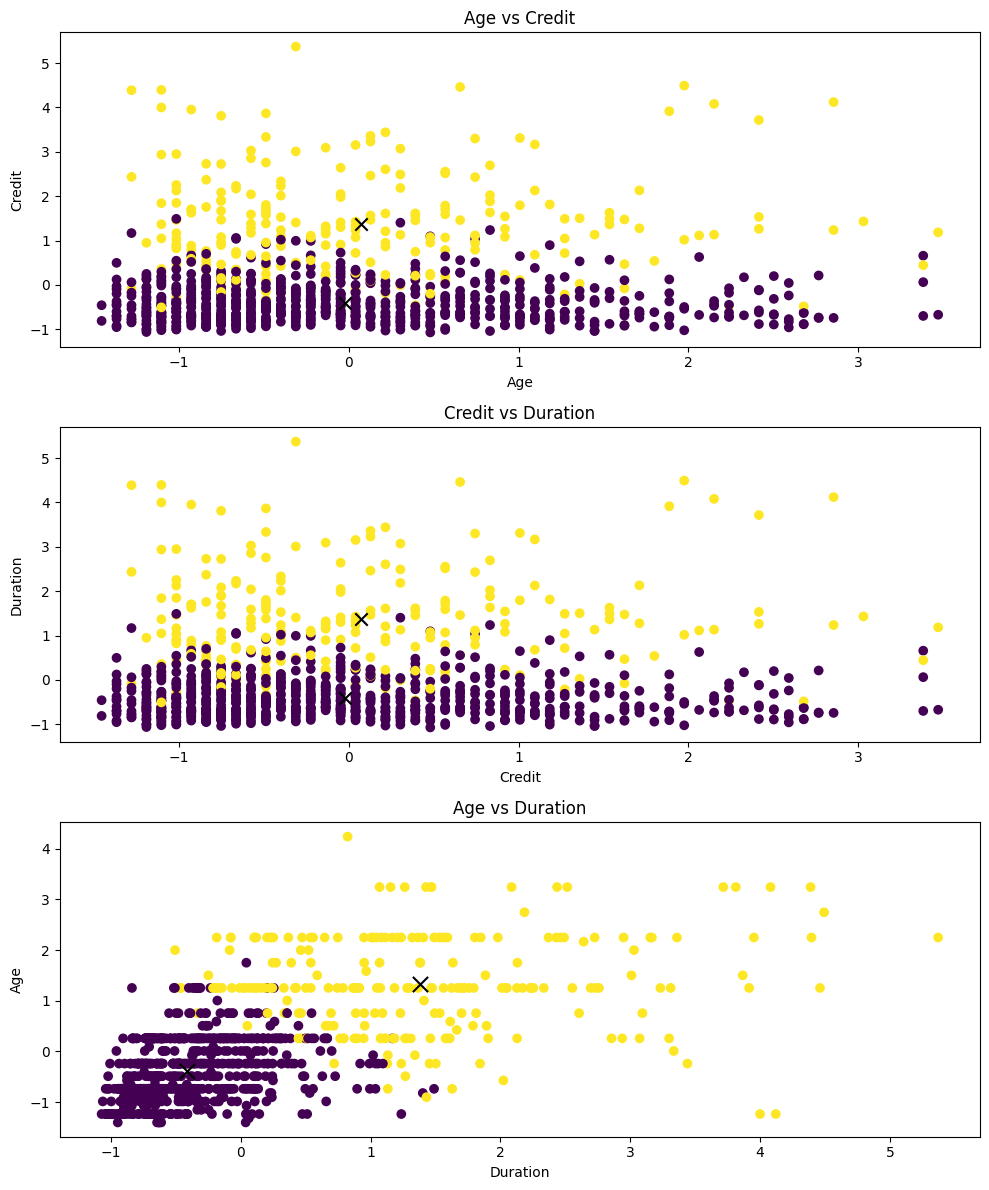

In [20]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 80, marker= 'x', color = 'k')
plt.xlabel('Age')
plt.ylabel('Credit')
plt.title('Age vs Credit')

plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=80, marker='x', color='k')
plt.xlabel('Credit')
plt.ylabel('Duration')
plt.title('Credit vs Duration')

plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=120, marker='x', color='k')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.title('Age vs Duration')

plt.tight_layout()
plt.show()

### When `k=4`

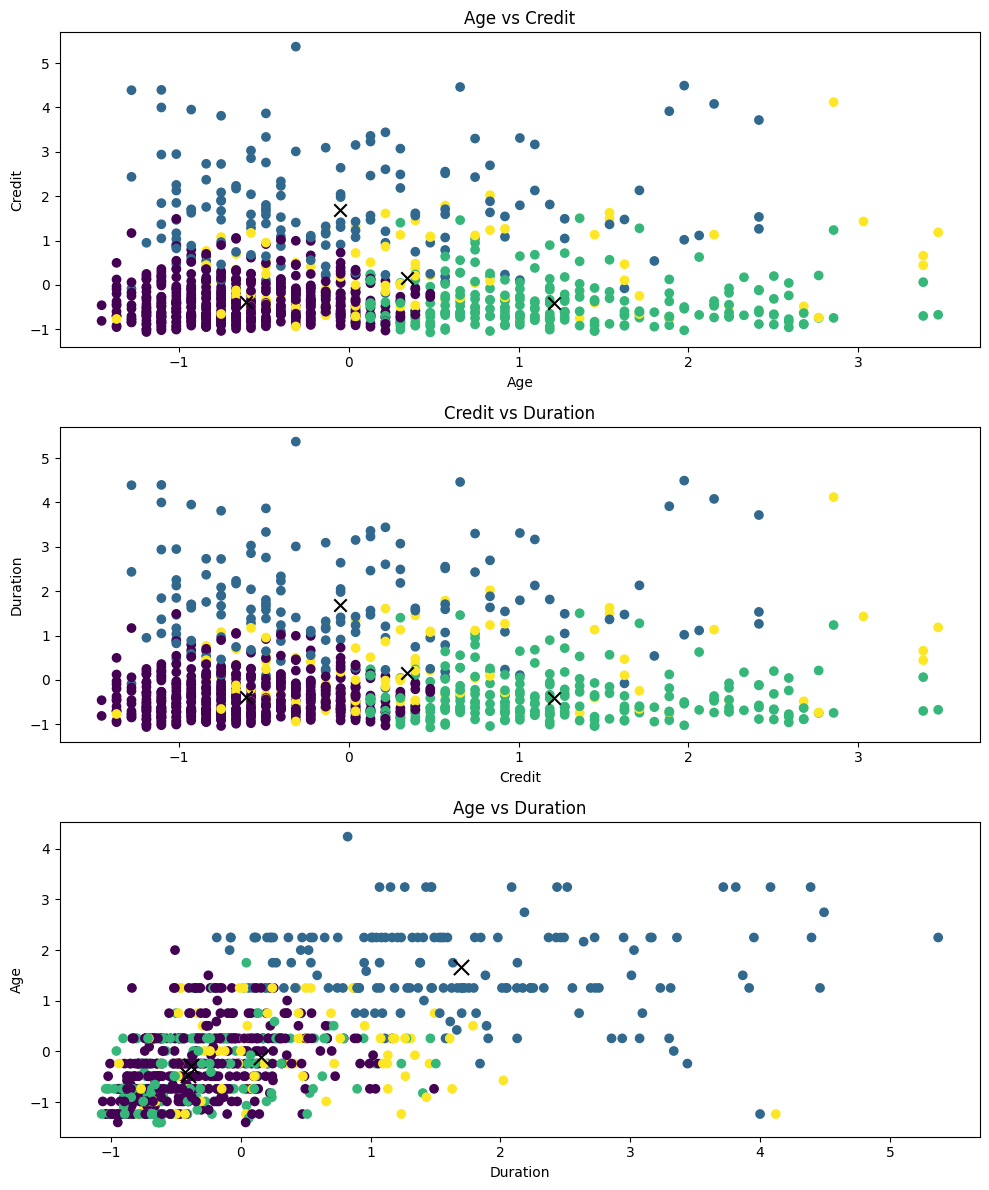

In [21]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(scaled_credit)

plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 80, marker= 'x', color = 'k')
plt.xlabel('Age')
plt.ylabel('Credit')
plt.title('Age vs Credit')

plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=80, marker='x', color='k')
plt.xlabel('Credit')
plt.ylabel('Duration')
plt.title('Credit vs Duration')

plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=120, marker='x', color='k')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.title('Age vs Duration')

plt.tight_layout()
plt.show()

## Data Transformations & Model Fit

In [22]:
# convert all column names to lowercase and remove spaces
def clean_column_names(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)
    return df

In [23]:
credit = clean_column_names(credit)
credit.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [25]:
credit['checking_account'].value_counts()

checking_account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [26]:
credit['saving_accounts'].value_counts()

saving_accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [27]:
# Append the cluster labels to the original dataframe
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_credit)

df = credit.copy()
df['cluster'] = kmeans.labels_
df.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,cluster
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0
2,49,male,1,own,little,NaN,2096,12,education,good,1


In [28]:
X = df.drop(columns=['risk'])
y = df['risk'].map(lambda x: 1 if x == 'bad' else 0)

In [29]:
y[:3], df['risk'][:3]

(0    0
 1    1
 2    0
 Name: risk, dtype: int64,
 0    good
 1     bad
 2    good
 Name: risk, dtype: object)

### Transformation Pipeline

In [29]:
X.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,cluster
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_features = ['age', 'job', 'credit_amount', 'duration']
cat_features = ['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with mean
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Replace NaN with 'unknown'
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
], remainder='passthrough')  # Keep unlisted columns unchanged


### 1-Model fit

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Apply the transformation
X_transformed = preprocessor.fit_transform(X)
lr = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(lr, X_transformed, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(lr, X_transformed, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(lr, X_transformed, y, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(lr, X_transformed, y, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(lr, X_transformed, y, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.7509
Mean Accuracy: 0.7363
Mean Recall: 0.3911
Mean Precision: 0.5915
Mean F1: 0.4679


In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# Apply the transformation
X_transformed = preprocessor.fit_transform(X)

# Create a bagging ensemble of logistic regression models
base_lr = LogisticRegression(solver='liblinear')  # Use liblinear solver for small datasets
bagged_lr = BaggingClassifier(estimator=base_lr, n_estimators=20, random_state=1, max_features=0.5, bootstrap=False, n_jobs=-1)

# Define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate performance
roc_aucs = cross_val_score(bagged_lr, X_transformed, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(bagged_lr, X_transformed, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(bagged_lr, X_transformed, y, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(bagged_lr, X_transformed, y, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(bagged_lr, X_transformed, y, scoring='f1', cv=cv, n_jobs=-1)

# Print results
print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))


Mean ROC AUC: 0.7580
Mean Accuracy: 0.7283
Mean Recall: 0.2467
Mean Precision: 0.6182
Mean F1: 0.3485


In [33]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Apply the transformation
X_transformed = preprocessor.fit_transform(X)

# Define base models
base_models = [
    ('logreg', LogisticRegression(solver='liblinear')),  # Logistic Regression
    ('rf', RandomForestClassifier(n_estimators=100, random_state=1))  # Random Forest
]

# Define meta-classifier (final model)
meta_classifier = LogisticRegression(solver='liblinear')

# Create stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, n_jobs=-1)

# Define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate performance
roc_aucs = cross_val_score(stacked_model, X_transformed, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(stacked_model, X_transformed, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(stacked_model, X_transformed, y, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(stacked_model, X_transformed, y, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(stacked_model, X_transformed, y, scoring='f1', cv=cv, n_jobs=-1)

# Print results
print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))


Mean ROC AUC: 0.7593
Mean Accuracy: 0.7370
Mean Recall: 0.3511
Mean Precision: 0.6064
Mean F1: 0.4399


### 2-Cluster Fit

In [34]:
X_transformed_0 = preprocessor.fit_transform(X[X.cluster == 0])
y_0 = y[X.cluster == 0]
lr = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(lr, X_transformed_0, y_0, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(lr, X_transformed_0, y_0, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(lr, X_transformed_0, y_0, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(lr, X_transformed_0, y_0, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(lr, X_transformed_0, y_0, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.6633
Mean Accuracy: 0.6216
Mean Recall: 0.5848
Mean Precision: 0.5883
Mean F1: 0.5779


In [36]:
X_transformed_1 = preprocessor.fit_transform(X[X.cluster == 1])
y_1 = y[X.cluster == 1]
lr = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(lr, X_transformed_1, y_1, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(lr, X_transformed_1, y_1, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(lr, X_transformed_1, y_1, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(lr, X_transformed_1, y_1, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(lr, X_transformed_1, y_1, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.7553
Mean Accuracy: 0.7652
Mean Recall: 0.3070
Mean Precision: 0.5700
Mean F1: 0.3930


### `cluster_id` as a feature

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Apply the transformation
X_transformed = preprocessor.fit_transform(X)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(rf, X_transformed, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(rf, X_transformed, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(rf, X_transformed, y, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(rf, X_transformed, y, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(rf, X_transformed, y, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.7618
Mean Accuracy: 0.7430
Mean Recall: 0.3711
Mean Precision: 0.6184
Mean F1: 0.4579


In [37]:
## Grid search

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define RandomForestClassifier model
rf = RandomForestClassifier(random_state=1)

# Define GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

# Apply the transformation and perform GridSearchCV
X_transformed = preprocessor.fit_transform(X)

# Fit GridSearchCV with cross-validation
grid_search.fit(X_transformed, y)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estima

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Apply the transformation
X_transformed = preprocessor.fit_transform(X)
# rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1, max_features='sqrt', min_samples_leaf=4, min_samples_split=2)
rf = grid_search.best_estimator_

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_aucs = cross_val_score(rf, X_transformed, y, scoring='roc_auc', cv=cv, n_jobs=-1)
accuracies = cross_val_score(rf, X_transformed, y, scoring='accuracy', cv=cv, n_jobs=-1)
recalls = cross_val_score(rf, X_transformed, y, scoring='recall', cv=cv, n_jobs=-1)
precisions = cross_val_score(rf, X_transformed, y, scoring='precision', cv=cv, n_jobs=-1)
f1s = cross_val_score(rf, X_transformed, y, scoring='f1', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.4f' % np.mean(roc_aucs))
print('Mean Accuracy: %.4f' % np.mean(accuracies))
print('Mean Recall: %.4f' % np.mean(recalls))
print('Mean Precision: %.4f' % np.mean(precisions))
print('Mean F1: %.4f' % np.mean(f1s))

Mean ROC AUC: 0.7709
Mean Accuracy: 0.7470
Mean Recall: 0.3589
Mean Precision: 0.6459
Mean F1: 0.4539


In [39]:
# Convert transformed array back to DataFrame (optional)
output_columns = (
    num_features + ['cluster'] + 
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)

In [40]:
# Generate feature importance ranking
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their corresponding importance values
importance_df = pd.DataFrame({
    'Feature': output_columns,
    'Importance': feature_importances
})

# Sort the features by their importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance ranking
importance_df

,Feature,Importance
2,credit_amount,0.162633
3,duration,0.137870
0,age,0.119504
17,checking_account_rich,0.118931
14,saving_accounts_unknown,0.079197
1,job,0.044271
26,purpose_vacation/others,0.037669
15,checking_account_little,0.034194
9,housing_rent,0.028129
13,saving_accounts_rich,0.027345


## Other Considerations

In [37]:
credit2 = credit.copy()
credit2['risk'] = credit2['risk'].apply(lambda x: 0 if x == 'good' else 1)
credit2.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0


In [38]:
X = credit2.drop(columns=['risk'])
y = credit2['risk']

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_features = ['age', 'job', 'credit_amount', 'duration']
cat_features = ['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with mean
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Replace NaN with 'unknown'
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
], remainder='passthrough')  # Keep unlisted columns unchanged


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_transformed = preprocessor.fit_transform(X_train)
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)
X_test_transformed = preprocessor.transform(X_test)
y_test_pred = lr.predict(X_test_transformed)

# calculate accuracy, recall, precision, f1
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.735
Precision: 0.5945945945945946
Recall: 0.36666666666666664
F1 Score: 0.4536082474226804


In [41]:
y_train_pred = lr.predict(X_train_transformed)

# calculate accuracy, recall, precision, f1
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.76
Precision: 0.66
Recall: 0.41
F1-score: 0.50


In [42]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train['risk_pred'] = y_train_pred
df_train['accuracy'] = y_train_pred == y_train
df_train['accuracy'] = df_train['accuracy'].astype(int)
df_train.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,risk_pred,accuracy
828,47,male,2,free,NaN,little,8335,36,car,1,0,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0,0,1
148,28,male,2,own,little,little,5371,36,furniture/equipment,0,1,0
735,29,female,0,own,NaN,moderate,3990,36,domestic appliances,0,0,1
130,24,female,2,own,NaN,moderate,8487,48,car,0,1,0


In [47]:
df_train.groupby('purpose').agg(accuracy_mean=('accuracy', 'mean'), row_count=('accuracy', 'count')).reset_index()

,purpose,accuracy_mean,row_count
0,business,0.721519,79
1,car,0.766187,278
2,domestic appliances,0.800000,10
3,education,0.711111,45
4,furniture/equipment,0.697987,149
5,radio/TV,0.818605,215
6,repairs,0.722222,18
7,vacation/others,0.666667,6


In [48]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test['risk_pred'] = y_test_pred
df_test['accuracy'] = y_test_pred == y_test
df_test['accuracy'] = df_test['accuracy'].astype(int)
df_test.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,risk_pred,accuracy
30,36,male,2,own,rich,moderate,1913,18,business,0,0,1
128,34,male,3,own,little,moderate,1860,12,car,0,0,1
289,48,male,2,own,little,little,1024,24,radio/TV,1,0,0
216,31,male,2,own,little,little,3104,18,business,0,0,1
966,23,male,1,own,quite rich,moderate,2520,27,radio/TV,1,0,0


In [49]:
df_test.groupby('purpose').agg(accuracy_mean=('accuracy', 'mean'), row_count=('accuracy', 'count')).reset_index()

,purpose,accuracy_mean,row_count
0,business,0.777778,18
1,car,0.644068,59
2,domestic appliances,0.500000,2
3,education,0.785714,14
4,furniture/equipment,0.750000,32
5,radio/TV,0.830769,65
6,repairs,0.250000,4
7,vacation/others,0.666667,6


In [50]:
summary_train = df_train.groupby('purpose').agg(accuracy_mean=('accuracy', 'mean'), row_count=('accuracy', 'count')).reset_index()
summary_test = df_test.groupby('purpose').agg(accuracy_mean=('accuracy','mean'), row_count=('accuracy', 'count')).reset_index()
summary = pd.merge(
    summary_train.rename(columns={'accuracy_mean': 'accuracy_mean_train', 'row_count': 'row_count_train'}),
    summary_test.rename(columns={'accuracy_mean': 'accuracy_mean_test', 'row_count': 'row_count_test'}),
    on='purpose',
)
summary

,purpose,accuracy_mean_train,row_count_train,accuracy_mean_test,row_count_test
0,business,0.721519,79,0.777778,18
1,car,0.766187,278,0.644068,59
2,domestic appliances,0.800000,10,0.500000,2
3,education,0.711111,45,0.785714,14
4,furniture/equipment,0.697987,149,0.750000,32
5,radio/TV,0.818605,215,0.830769,65
6,repairs,0.722222,18,0.250000,4
7,vacation/others,0.666667,6,0.666667,6
